In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lets assume the function that we are interpolating is ϕ(x) = sin(2πx) · cos(5πx)

def phi(x):
    val=np.sin(2*np.pi*x)*np.cos(5*np.pi*x)
    return val

In [3]:
print(phi(22))

-1.9599300631450357e-14


In [4]:
def gaussian(x1,x2,sigma=1):
    val=np.exp(-(x1-x2)**2/(2*sigma**2))
    return val

In [13]:
def kernel_matrix(X, sigma=1, f=gaussian):
    mat = np.zeros([len(X),len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            mat[i,j]= f(X[i],X[j],sigma)
    return mat

In [17]:
def rbf_model(A, w):
    val=np.dot(np.linalg.inv(A),w)
    return val

In [18]:
def rbf_predict(x, X, m, l = 1, f = gaussian):
    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i], l)
    return S

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_20153/1587877697.py:17: SyntaxWarning: invalid escape sequence '\p'
  "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)$",
/tmp/ipykernel_20153/1587877697.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi(x)$", fontsize = 16)


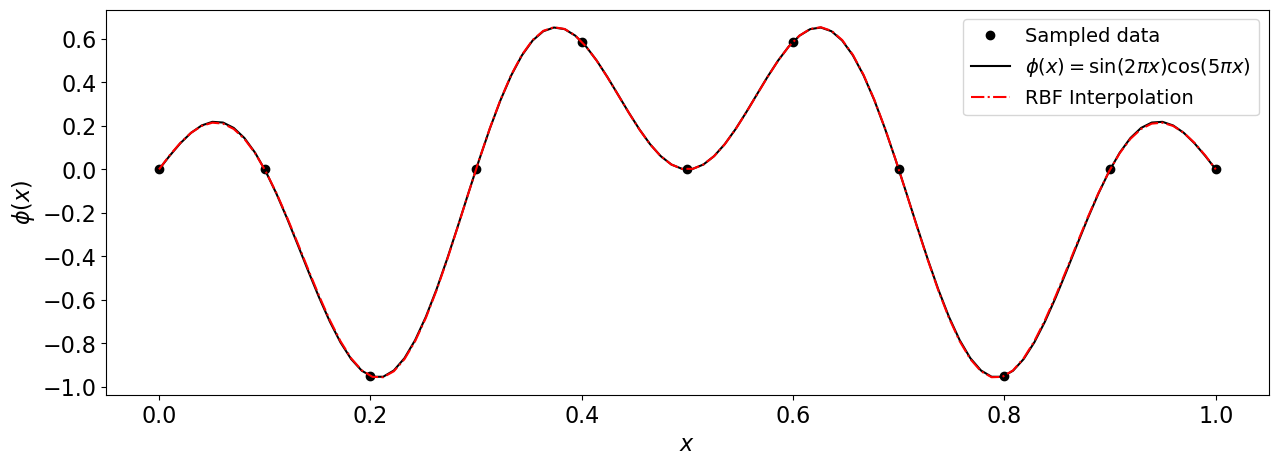

In [22]:
# Sample 10 values of X and phi.
N = 10
X = np.arange(0, N + 1, 1) / N
d = phi(X)# Gaussian length scale.
L = 1 / 9# Calculate the kernel matrix G
G = kernel_matrix(X, L, gaussian)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)
S = rbf_predict(x, X, m, L, gaussian)# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
plt.plot(x, phi(x), "k") # True "continuous" values of phi.
plt.plot(x, S, "r-.")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

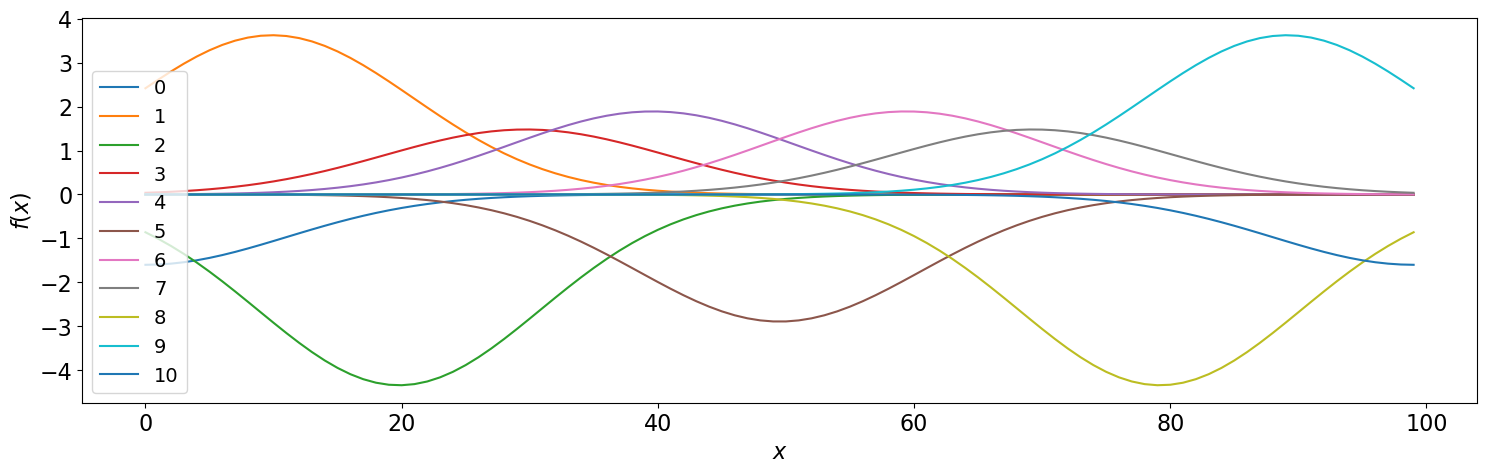

In [23]:
# Plot the 10 weighted Gaussians used in the interpolation model.
plt.figure(figsize = [18, 5])
for i in range(len(m)):
    plt.plot(m[i] * gaussian(x, X[i], L))
plt.legend(range(len(m)), fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$f(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()